In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['Real estate.csv']))

In [ ]:
df.rename(columns = {'X1 transaction date':'Transaction_date', 'X2 house age':'House_age',
                              'X3 distance to the nearest MRT station':'Distance_to_the_nearest_MRT_station',
                      'X4 number of convenience stores':'number_of_convenience_stores','X5 latitude':'latitude',
                      'X6 longitude':'longitude','Y house price of unit area':'price'}, inplace = True)
X= df

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df['labels'] = kmeans.labels_

In [ ]:
df['labels'].unique()

array([0, 2, 1], dtype=int32)

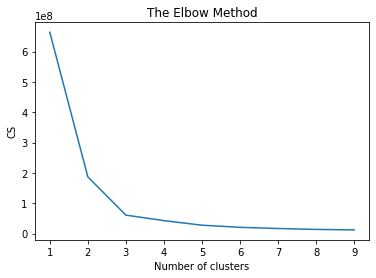

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# X=df
# one_hot_encoded_data = pd.get_dummies(X, columns = ['labels'])
# one_hot_encoded_data.replace({"NA": np.nan},inplace=True)
# print(one_hot_encoded_data)

      No  Transaction_date  House_age  Distance_to_the_nearest_MRT_station  \
0      1          2012.917       32.0                             84.87882   
1      2          2012.917       19.5                            306.59470   
2      3          2013.583       13.3                            561.98450   
3      4          2013.500       13.3                            561.98450   
4      5          2012.833        5.0                            390.56840   
..   ...               ...        ...                                  ...   
409  410          2013.000       13.7                           4082.01500   
410  411          2012.667        5.6                             90.45606   
411  412          2013.250       18.8                            390.96960   
412  413          2013.000        8.1                            104.81010   
413  414          2013.500        6.5                             90.45606   

     number_of_convenience_stores  latitude  longitude  price  

In [ ]:
# X=one_hot_encoded_data

In [ ]:
# X_norm = X[['Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','longitude']]
# X_norm.head(5)

In [ ]:
# X_norm = (X_norm-X_norm.mean())/(X_norm.max()-X_norm.min())
# X_norm.head(5)

In [ ]:
# temp1=X_norm
# temp2=X


In [ ]:
# temp2=temp2.drop(['No','Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'House_age','latitude','longitude'], axis = 1)

In [ ]:
# res=temp1.join(temp2)
# df=res

In [ ]:
# def price_label(x):
#   y=[]
#   for i in x:
#     if i>0 and i<20:
#       y.append("A")
#     elif i>20 and i<40:
#       y.append("B")
#     elif i>40 and i<60:
#       y.append("C")
#     elif i>60 and i<80:
#       y.append("D")
#     elif i>80 and i<100:
#       y.append("E")    
#     elif i>100:
#       y.append("F")
#     else:
#       y.append("NA")
#   return y
# a= df['price']
# b=price_label(a)
# c= pd.DataFrame(b)
# c.head(10)

,0
0,B
1,C
2,C
3,C
4,C
5,B
6,C
7,C
8,A
9,B


In [ ]:
# df['Label'] = b
# df.replace({"NA": np.nan},inplace=True)
# df.dropna(axis=0,inplace=True)

In [ ]:
# df['Distance_to_the_nearest_MRT_station']=df['Distance_to_the_nearest_MRT_station']/1000

In [ ]:
df.head(20)

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,2
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,0
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,0
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,1
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,2


In [ ]:
df.describe()

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,0.548309
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.835840
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,0.000000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,0.000000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,0.000000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,1.000000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2.000000


In [ ]:
# # Use numpy to convert to arrays
# import numpy as np
# features=df
# labels = np.array(features['Label'])

# X = df[['Transaction_date', 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
# y=  df['Label']
# feature_list = list(X)
# # Convert to numpy array
# features = np.array(X)
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size = 0.25, random_state = 42)


In [ ]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
# X_train = training_set[[ 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
# Y_train = training_set['labels']
# X_test = test_set[['House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
# Y_test = test_set['labels']
X_train = training_set[['House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
Y_train = training_set['price']
X_test = test_set[[ 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
Y_test = test_set['price']
# features=df
# labels = np.array(features['Label'])

# X = df[['Transaction_date', 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
# y=  df['price']

In [ ]:
# from sklearn.svm import SVC
# classifier = SVC(kernel='rbf', random_state = 1)
# classifier.fit(X_train,Y_train)

SVC(random_state=1)

In [ ]:
# Y_pred = classifier.predict(X_test)

In [ ]:
# test_set["Predictions"] = Y_pred

In [ ]:
# test_set

,No,Transaction_date,House_age,Distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,price,labels,Predictions
388,389,2013.500,10.4,2251.93800,4,24.95957,121.51353,27.3,2,2
102,103,2013.083,1.1,193.58450,6,24.96571,121.54089,54.4,0,0
187,188,2013.000,8.9,3078.17600,0,24.95464,121.56627,22.0,1,1
162,163,2012.750,16.0,4066.58700,0,24.94297,121.50342,11.6,1,1
90,91,2012.833,0.0,274.01440,1,24.97480,121.53059,45.4,0,0
...,...,...,...,...,...,...,...,...,...,...
322,323,2013.000,12.9,187.48230,1,24.97388,121.52981,33.1,0,0
119,120,2013.500,16.6,289.32480,5,24.98203,121.54348,59.6,0,0
245,246,2013.417,7.5,639.61980,5,24.97258,121.54814,40.8,0,0
146,147,2012.750,0.0,185.42960,0,24.97110,121.53170,52.2,0,0


In [ ]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test,Y_pred)
# accuracy = float(cm.diagonal().sum())/len(Y_test)
# print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  1.0


In [ ]:
# classifier.score(X_test,Y_test)

1.0

In [ ]:
# from sklearn.dummy import DummyClassifier
# dummy_majority= DummyClassifier(strategy='most_frequent').fit(X_train,Y_train)
# y_dummy_predictions=dummy_majority.predict(X_test)
# y_dummy_predictions

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B'], dtype='<U1')

In [ ]:
# dummy_majority.score(X_test,Y_test)

0.43373493975903615

In [ ]:
# from sklearn.metrics import mean_absolute_error
# print("MAE",mean_absolute_error(Y_test,Y_pred))

In [ ]:
X = df[['Transaction_date', 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
y=  df['price']

In [ ]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size = 0.2, random_state = 1)

In [ ]:
X_train = training_set[[ 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude',]]
Y_train = training_set['price']
X_test = test_set[[ 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude']]
Y_test = test_set['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
# y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

SVR()

In [ ]:
# from sklearn.svm import SVR
# regressor = SVR(kernel = 'rbf')
# regressor.fit(X, y)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))

MAE 5.012607457537233


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,y_pred))

MSE 39.636901629400285


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 6.295784433206102


In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(Y_test,y_pred))))

RMSE 1.8398802718386815


In [ ]:
# y_pred = regressor.predict(6.5)
# # y_pred = sc_y.inverse_transform(y_pred) 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = df[['Transaction_date', 'House_age', 'Distance_to_the_nearest_MRT_station','number_of_convenience_stores', 'latitude','longitude']]
y=  df['price']

In [ ]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [ ]:
X_norm = (X-X.mean())/(X.max()-X.min())
y_norm = (y-y.mean())/(y.max()-y.min())

In [ ]:
X.size

2484

In [ ]:
y.size

414

In [ ]:
# X_grid = np.arange(min(X['House_age']), max(X['House_age']), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))

# plt.scatter(X['House_age'], y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()